In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from wordcloud import WordCloud

In [130]:
url_medal_count = './data/summerOly_medal_counts.csv'
url_atheletes = './data/summerOly_athletes.csv'
url_hosts = './data/summerOly_hosts.csv'
url_programs = './data/encoded-summerOly_programs.csv'

In [159]:
# Load dataset
df_medal_count = pd.read_csv(url_medal_count)

df_hosts = pd.read_csv(url_hosts)

df_athelete = pd.read_csv(url_atheletes)

df_programs = pd.read_csv(url_programs)

df_medal_count['NOC'] = df_medal_count['NOC'].str.strip()

In [160]:
#Years represented in each dataset.

years_program_dataset = [1896, 1900,1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980,
       1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016,
       2020, 2024]

years_athelete_dataset = df_athelete['Year'].unique()

years_hosts_dataset = df_hosts['Year'].unique()

years_medalcount_dataset = df_medal_count['Year'].unique()

# Analysing year representations in each dataset

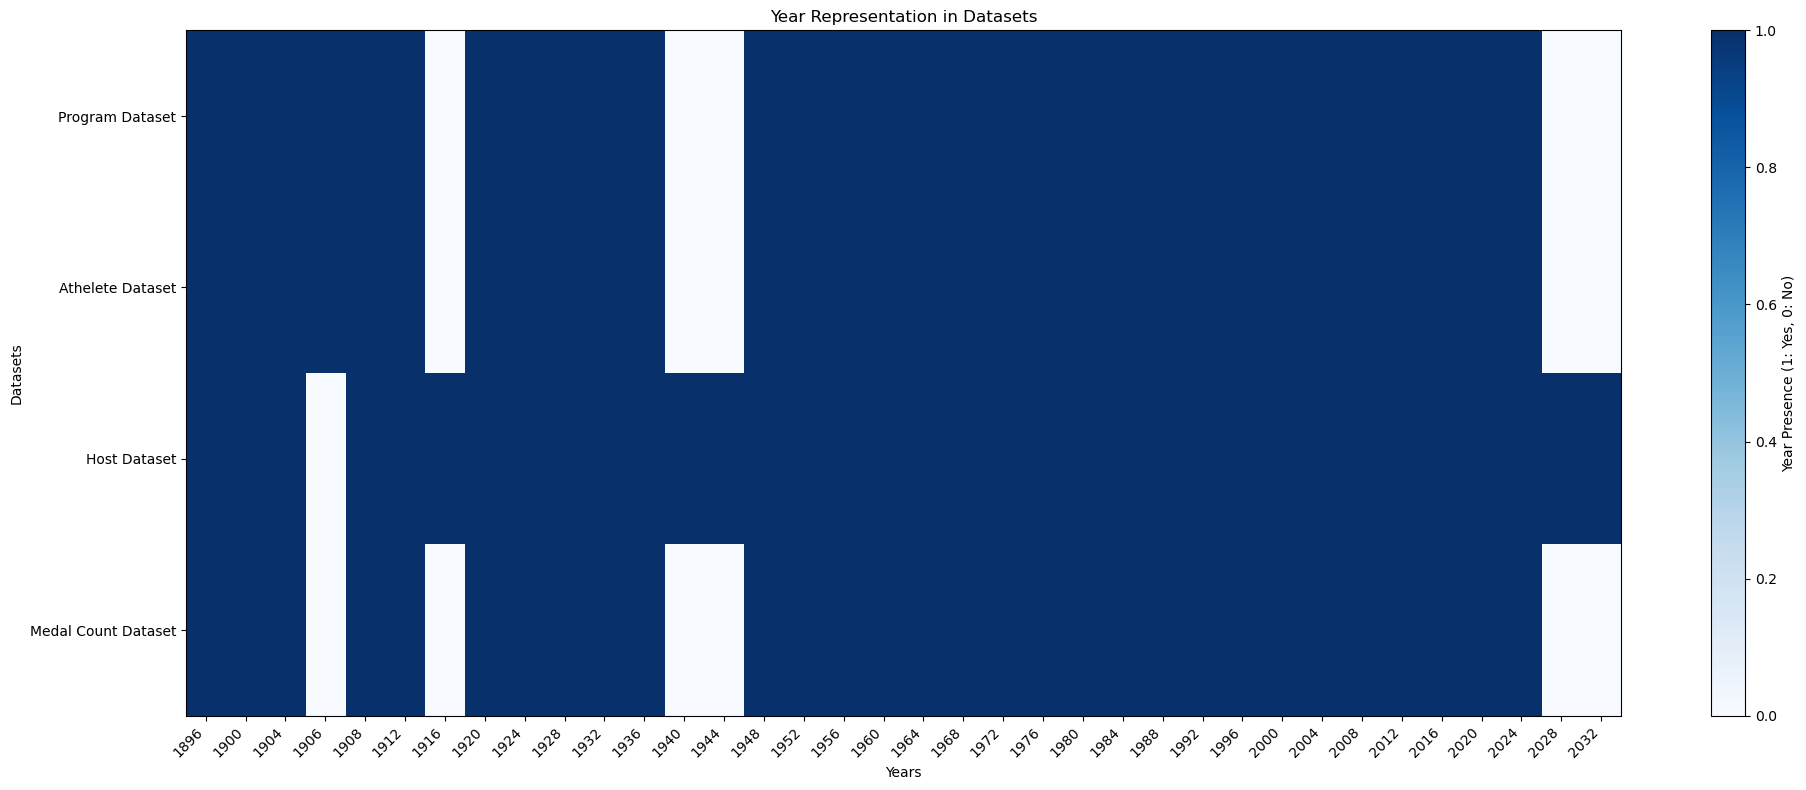

In [161]:
# Example data
datasets = {
    "Program Dataset": years_program_dataset,
    "Athelete Dataset": years_athelete_dataset,
    "Host Dataset": years_hosts_dataset,
    "Medal Count Dataset": years_medalcount_dataset
}

# Create a sorted list of unique years across all datasets
all_years = sorted({year for years in datasets.values() for year in years})

# Create a DataFrame for visualization
data_matrix = pd.DataFrame(index=all_years, columns=datasets.keys(), data=0)
for dataset, years in datasets.items():
    data_matrix.loc[years, dataset] = 1

# Plotting the graph
fig, ax = plt.subplots(figsize=(20, 8))
im = ax.imshow(data_matrix.T, cmap="Blues", aspect="auto")

# Set axis labels and titles
ax.set_xticks(range(len(all_years)))
ax.set_xticklabels(all_years, rotation=45, ha="right")
ax.set_yticks(range(len(datasets)))
ax.set_yticklabels(datasets.keys())
ax.set_title("Year Representation in Datasets")
ax.set_xlabel("Years")
ax.set_ylabel("Datasets")

# Add a color bar for better understanding
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Year Presence (1: Yes, 0: No)")

plt.tight_layout()
plt.show()

# Analysing Medal Counts

In [162]:
df_medal_count

,Rank,NOC,Gold,Silver,Bronze,Total,Year
0,1,United States,11,7,2,20,1896
1,2,Greece,10,18,19,47,1896
2,3,Germany,6,5,2,13,1896
3,4,France,5,4,2,11,1896
4,5,Great Britain,2,3,2,7,1896
...,...,...,...,...,...,...,...
1430,84,Qatar,0,0,1,1,2024
1431,84,Refugee Olympic Team,0,0,1,1,2024
1432,84,Singapore,0,0,1,1,2024
1433,84,Slovakia,0,0,1,1,2024


# Names of Countries Represented

In [163]:
# List of countries represented in the Olympics
countries = df_medal_count['NOC'].unique()

# Number of columns per row
n_cols = 4  

# Print countries in rows
for i in range(0, len(countries), n_cols):
    print(" | ".join(f"{country:<15}" for country in countries[i:i+n_cols]))

United States   | Greece          | Germany         | France         
Great Britain   | Hungary         | Austria         | Australia      
Denmark         | Switzerland     | Mixed team      | Belgium        
Italy           | Cuba            | Canada          | Spain          
Luxembourg      | Norway          | Netherlands     | India          
Bohemia         | Sweden          | Australasia     | Russian Empire 
Finland         | South Africa    | Estonia         | Brazil         
Japan           | Czechoslovakia  | New Zealand     | Yugoslavia     
Argentina       | Uruguay         | Poland          | Haiti          
Portugal        | Romania         | Egypt           | Ireland        
Chile           | Philippines     | Mexico          | Latvia         
Turkey          | Jamaica         | Peru            | Ceylon         
Trinidad and Tobago | Panama          | South Korea     | Iran           
Puerto Rico     | Soviet Union    | Lebanon         | Bulgaria       
Venezuela       

In [164]:
# Group by NOC (Country) and calculate cumulative totals
result = df_medal_count.groupby("NOC").agg(
    Total_Gold=("Gold", "sum"),
    Total_Silver=("Silver", "sum"),
    Total_Bronze=("Bronze", "sum"),
    Grand_Total=("Total", "sum")
).reset_index()

# Sort by Grand Total in descending order
result = result.sort_values(by="Grand_Total", ascending=False)

# Display the result
print(result)

               NOC  Total_Gold  Total_Silver  Total_Bronze  Grand_Total
153  United States        1105           879           780         2764
131   Soviet Union         395           319           296         1010
55   Great Britain         299           339           343          981
50          France         240           278           299          817
27           China         303           226           198          727
..             ...         ...           ...           ...          ...
134          Sudan           0             1             0            1
43         Eritrea           0             0             1            1
38        Dominica           1             0             0            1
139         Taiwan           0             0             1            1
51           Gabon           0             1             0            1

[164 rows x 5 columns]


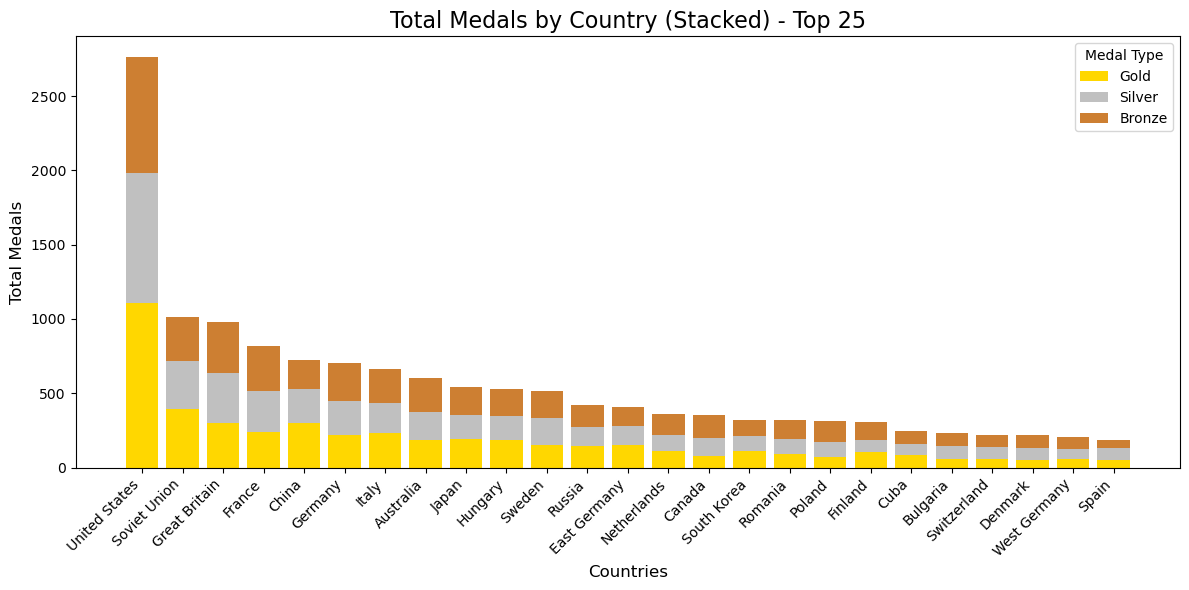

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create DataFrame
df = pd.DataFrame(result)
df=df[0:25]

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bars for gold, silver, and bronze as stacked bars
ax.bar(df["NOC"], df["Total_Gold"], label="Gold", color="gold")
ax.bar(df["NOC"], df["Total_Silver"], bottom=df["Total_Gold"], label="Silver", color="silver")
ax.bar(df["NOC"], df["Total_Bronze"], bottom=df["Total_Gold"] + df["Total_Silver"], label="Bronze", color="#cd7f32")

# Add labels and title
ax.set_xlabel("Countries", fontsize=12)
ax.set_ylabel("Total Medals", fontsize=12)
ax.set_title("Total Medals by Country (Stacked) - Top 25", fontsize=16)
ax.legend(title="Medal Type")

# Display the plot
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()


# Gold medal distribution

/tmp/ipykernel_53017/216797009.py:15: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



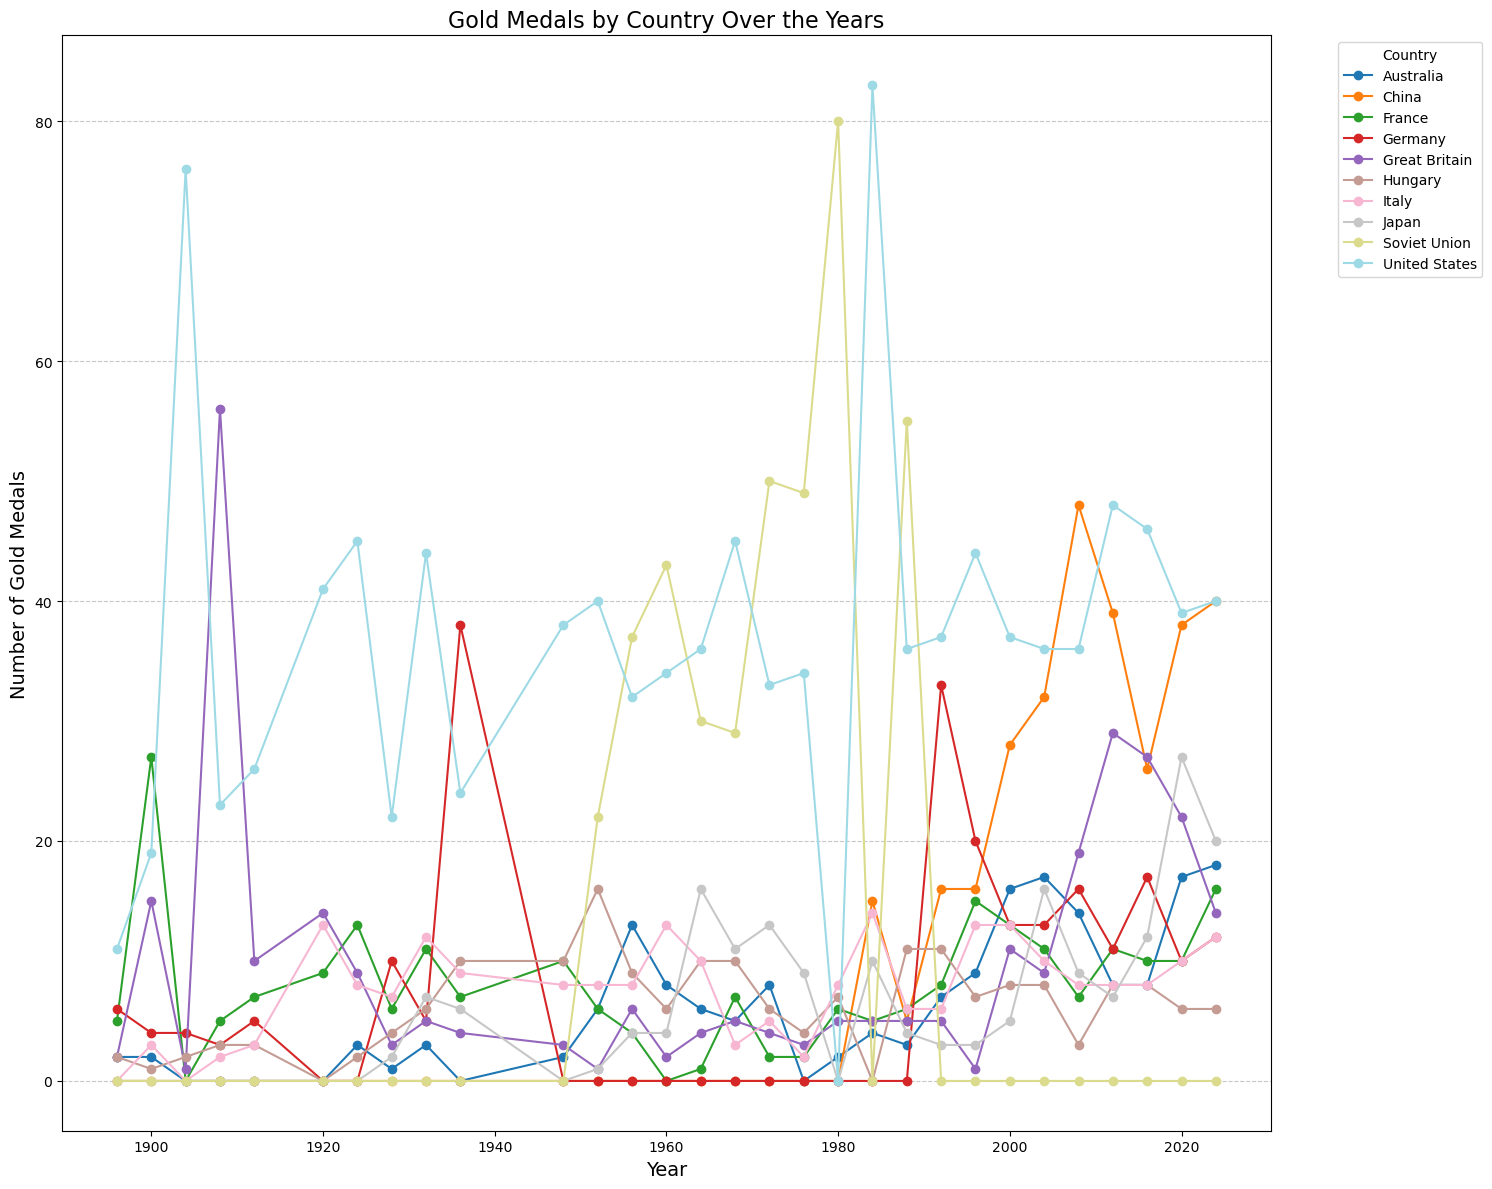

In [166]:
# Top 20 gold medals distribution over the year
import matplotlib.cm as cm

top_countries = result[0:10]['NOC']


# Select rows where the NOC is in the selected_countries list
selected_rows = df_medal_count[df_medal_count['NOC'].isin(top_countries)]

# Group by Year and NOC, then sum gold medals (if needed)
grouped = selected_rows.groupby(['Year', 'NOC'])['Gold'].sum().unstack(fill_value=0)

# Generate a colormap with a distinct color for each country
num_countries = len(grouped.columns)
colors = cm.get_cmap('tab20', num_countries)  # Use 'tab20' or another colormap

# Plotting
plt.figure(figsize=(15, 12))

for idx, country in enumerate(grouped.columns):
    plt.plot(
        grouped.index, grouped[country], 
        marker='o', label=country, 
        color=colors(idx)  # Assign a distinct color to each line
    )

# Customization
plt.title("Gold Medals by Country Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Gold Medals", fontsize=14)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Silver Medal Distribution

/tmp/ipykernel_53017/2810266426.py:15: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



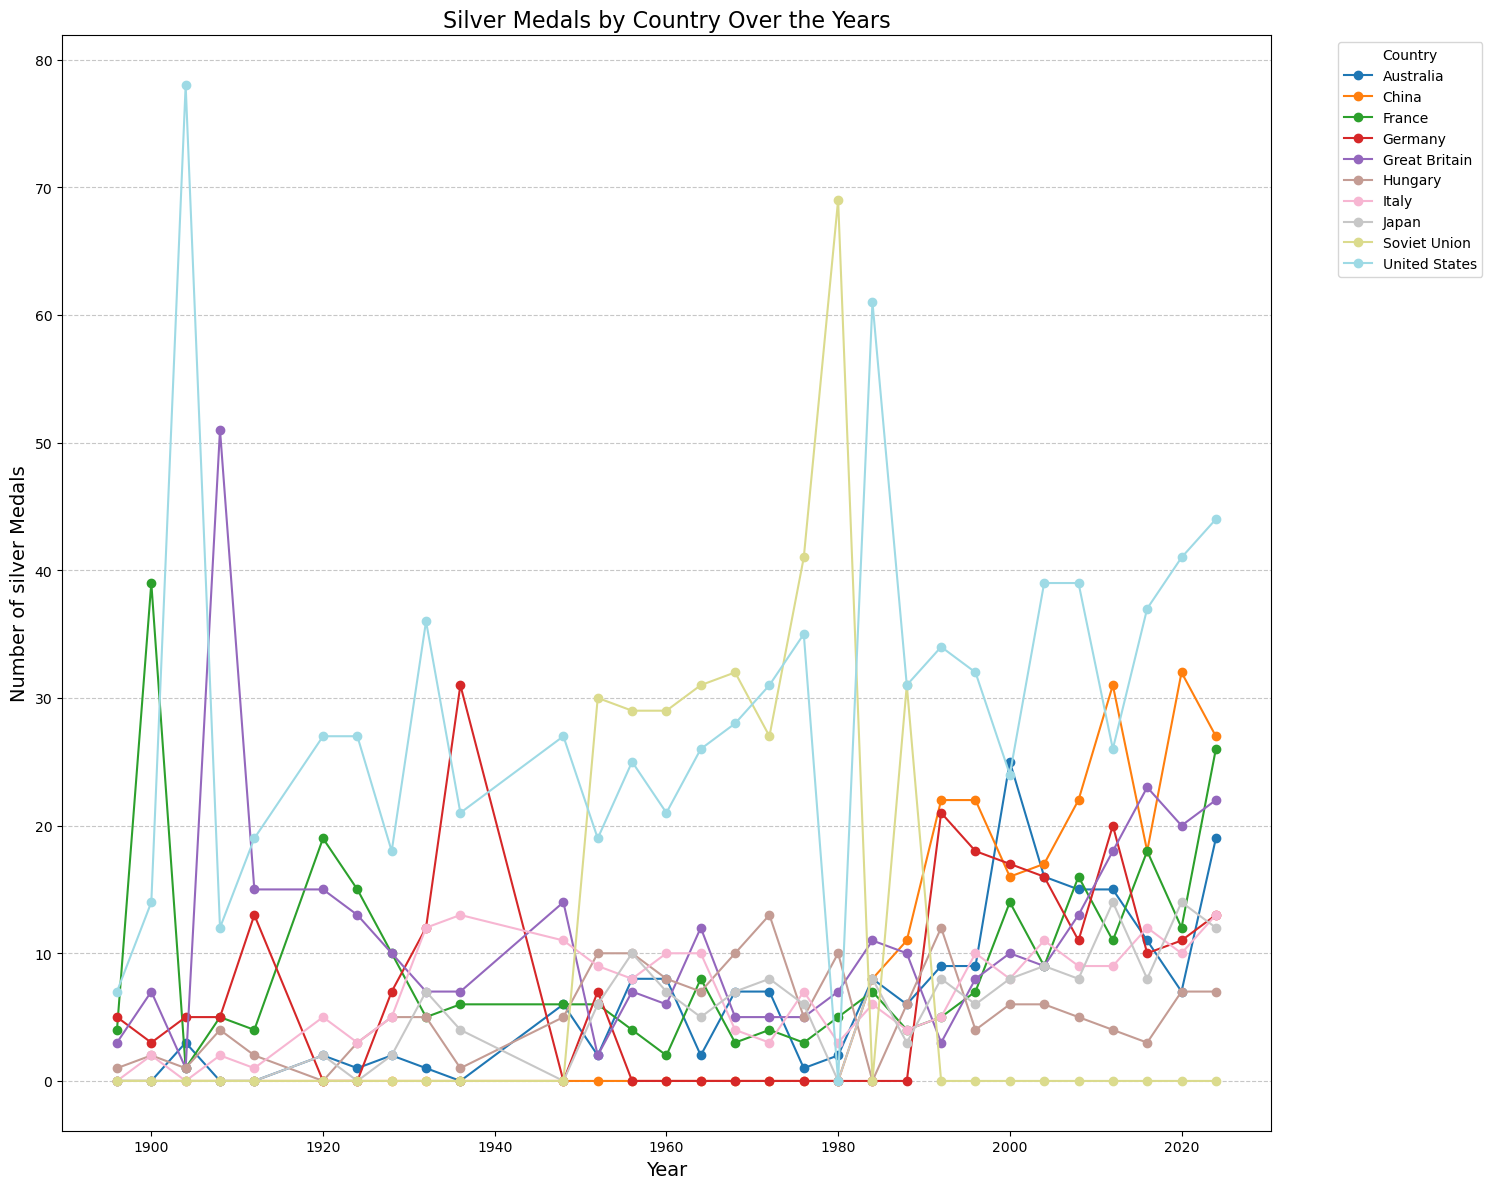

In [167]:
# Top 20 silver medals distribution over the year
import matplotlib.cm as cm

top_countries = result[0:10]['NOC']


# Select rows where the NOC is in the selected_countries list
selected_rows = df_medal_count[df_medal_count['NOC'].isin(top_countries)]

# Group by Year and NOC, then sum gold medals (if needed)
grouped = selected_rows.groupby(['Year', 'NOC'])['Silver'].sum().unstack(fill_value=0)

# Generate a colormap with a distinct color for each country
num_countries = len(grouped.columns)
colors = cm.get_cmap('tab20', num_countries)  # Use 'tab20' or another colormap

# Plotting
plt.figure(figsize=(15, 12))

for idx, country in enumerate(grouped.columns):
    plt.plot(
        grouped.index, grouped[country], 
        marker='o', label=country, 
        color=colors(idx)  # Assign a distinct color to each line
    )

# Customization
plt.title("Silver Medals by Country Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of silver Medals", fontsize=14)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_53017/509597960.py:15: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



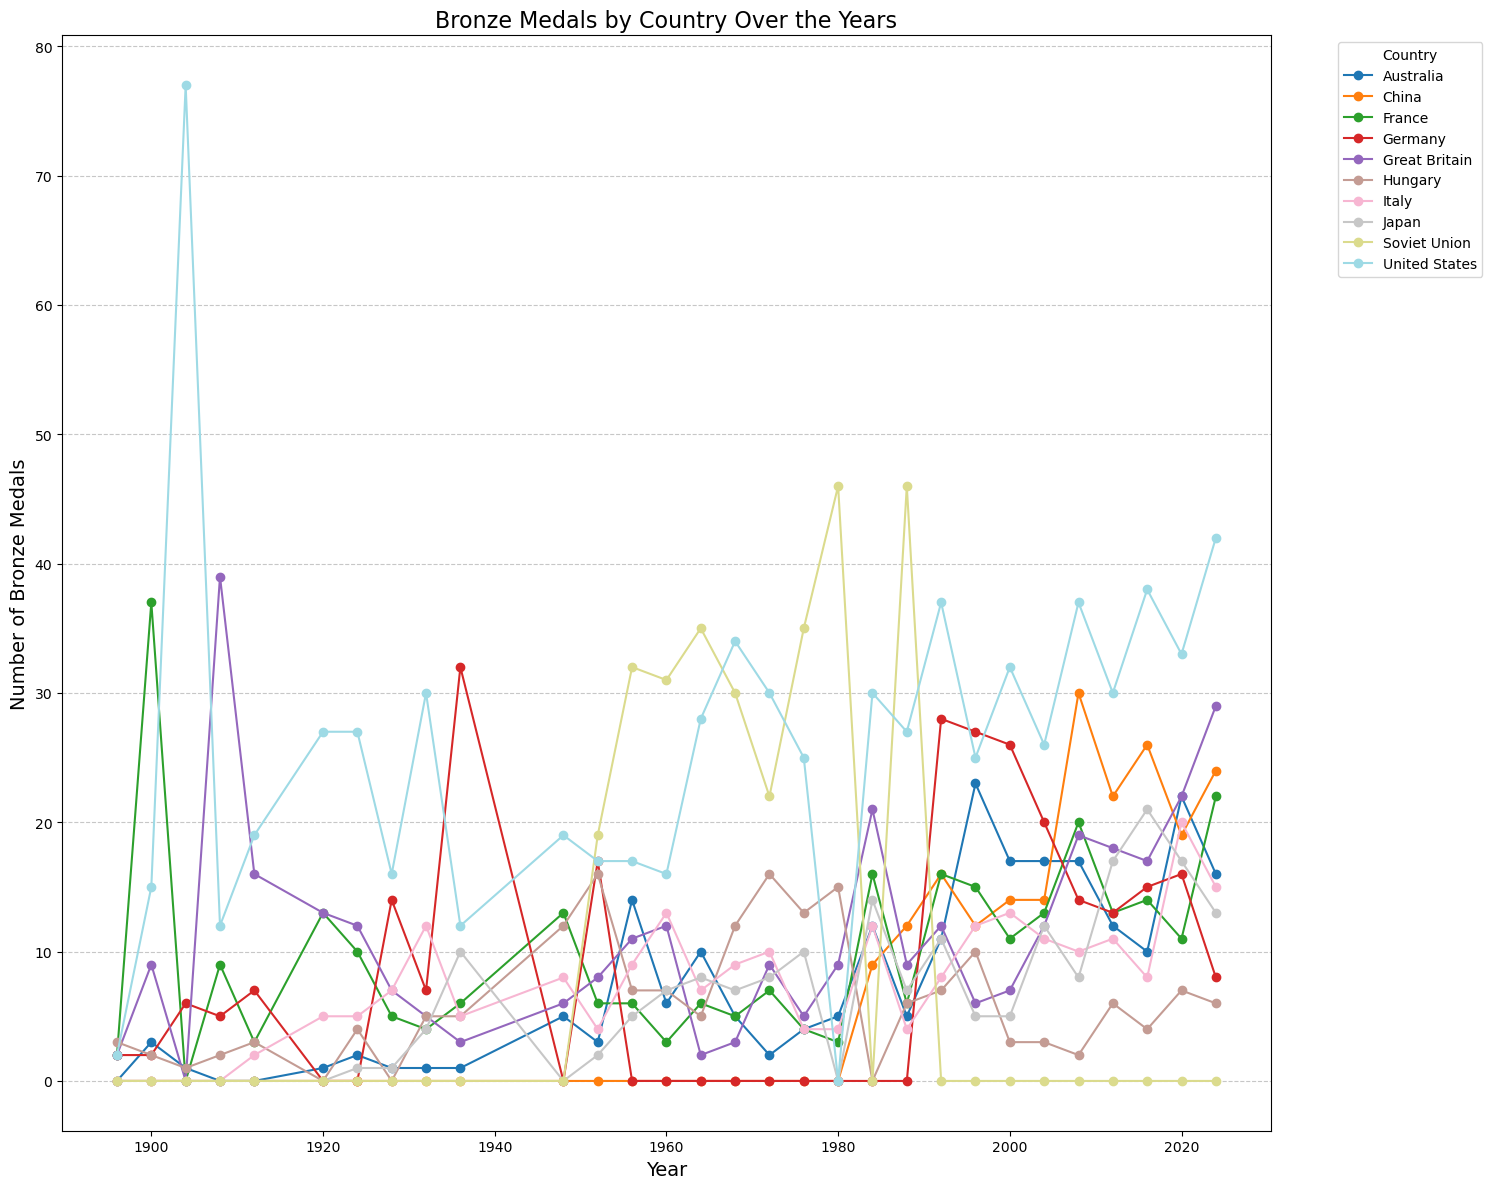

In [168]:
# Top 20 bronze medals distribution over the year
import matplotlib.cm as cm

top_countries = result[0:10]['NOC']


# Select rows where the NOC is in the selected_countries list
selected_rows = df_medal_count[df_medal_count['NOC'].isin(top_countries)]

# Group by Year and NOC, then sum gold medals (if needed)
grouped = selected_rows.groupby(['Year', 'NOC'])['Bronze'].sum().unstack(fill_value=0)

# Generate a colormap with a distinct color for each country
num_countries = len(grouped.columns)
colors = cm.get_cmap('tab20', num_countries)  # Use 'tab20' or another colormap

# Plotting
plt.figure(figsize=(15, 12))

for idx, country in enumerate(grouped.columns):
    plt.plot(
        grouped.index, grouped[country], 
        marker='o', label=country, 
        color=colors(idx)  # Assign a distinct color to each line
    )

# Customization
plt.title("Bronze Medals by Country Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Bronze Medals", fontsize=14)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Change in Rank Over Years

/tmp/ipykernel_53017/2700301048.py:14: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



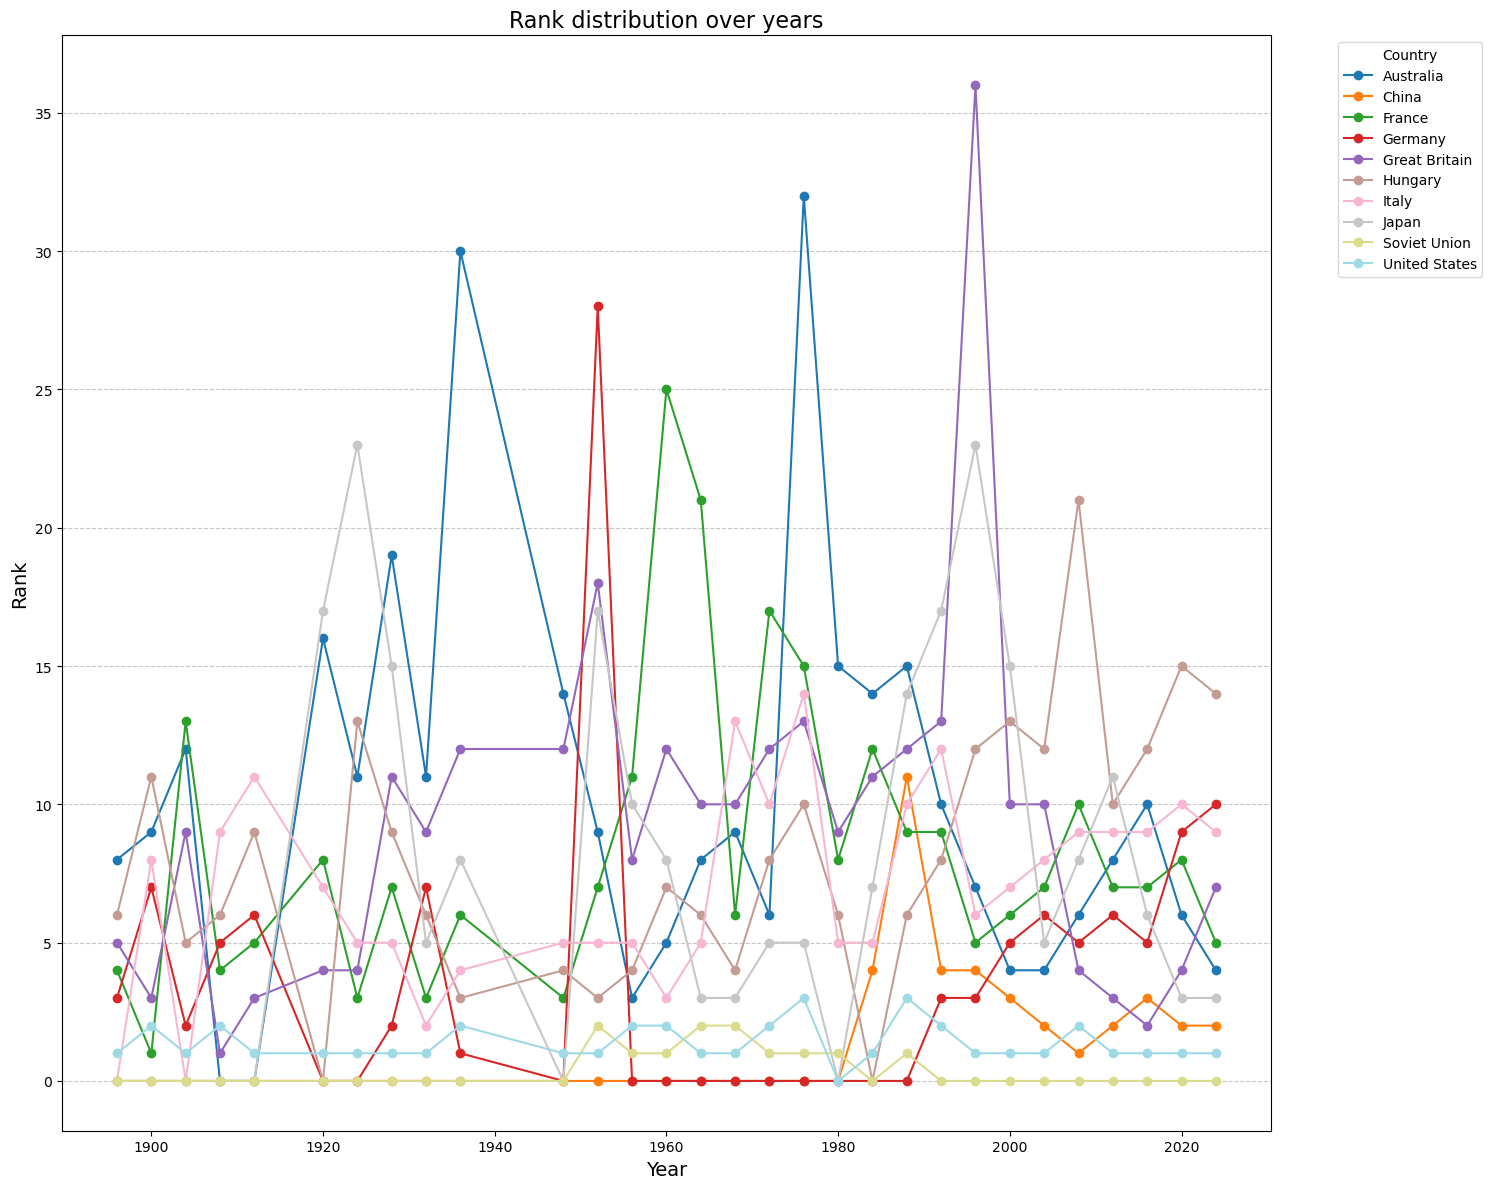

In [169]:
# Top 20 countries rank distribution over years
top_countries = result[0:10]['NOC']


# Select rows where the NOC is in the selected_countries list
selected_rows = df_medal_count[df_medal_count['NOC'].isin(top_countries)]

# Group by Year and NOC, then sum gold medals (if needed)
grouped = selected_rows.groupby(['Year', 'NOC'])['Rank'].sum().unstack(fill_value=0)


# Generate a colormap with a distinct color for each country
num_countries = len(grouped.columns)
colors = cm.get_cmap('tab20', num_countries)  # Use 'tab20' or another colormap

# Plotting
plt.figure(figsize=(15, 12))

for idx, country in enumerate(grouped.columns):
    plt.plot(
        grouped.index, grouped[country], 
        marker='o', label=country, 
        color=colors(idx)  # Assign a distinct color to each line
    )

# Customization
plt.title("Rank distribution over years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Rank", fontsize=14)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Analyse different countries and their first time wins

# Hosts and the country wins

In [152]:
df_medal_count[df_medal_count['NOC'] == 'Australasia']

,Rank,NOC,Gold,Silver,Bronze,Total,Year
55,11,Australasia,1,2,2,5,1908
75,12,Australasia,2,2,3,7,1912


In [158]:
df_programs

,Sport,Discipline,Code,Sports Governing Body,1896,1900,1904,1906*,1908,1912,...,1988,1992,1996,2000,2004,2008,2012,2016,2020,2024
0,Aquatics,Artistic Swimming,SWA,World Aquatics,0,0,0,0,0,0,...,2,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,Aquatics,Diving,DIV,World Aquatics,0,0,2,1,2,4,...,4,4,4.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
2,Aquatics,Marathon Swimming,OWS,World Aquatics,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
3,Aquatics,Swimming,SWM,World Aquatics,4,7,9,4,6,9,...,31,31,32.0,32.0,32.0,32.0,32.0,32.0,35.0,35.0
4,Aquatics,Water Polo,WPO,World Aquatics,0,1,1,0,1,1,...,1,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Skating,Figure,FSK,ISU,0,0,0,0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,Ice Hockey,Ice Hockey,IHO,IIHF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Total events,Total events,Total events,Total events,43,97,95,76,110,102,...,237,257,271.0,300.0,301.0,302.0,302.0,306.0,339.0,329.0
72,Total disciplines,Total disciplines,Total disciplines,Total disciplines,10,22,18,13,25,18,...,31,34,37.0,40.0,40.0,42.0,40.0,42.0,50.0,48.0
